In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
#from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("happiness.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.drop(['Happiness Rank','Country','Region'], axis = 1, inplace=True)
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


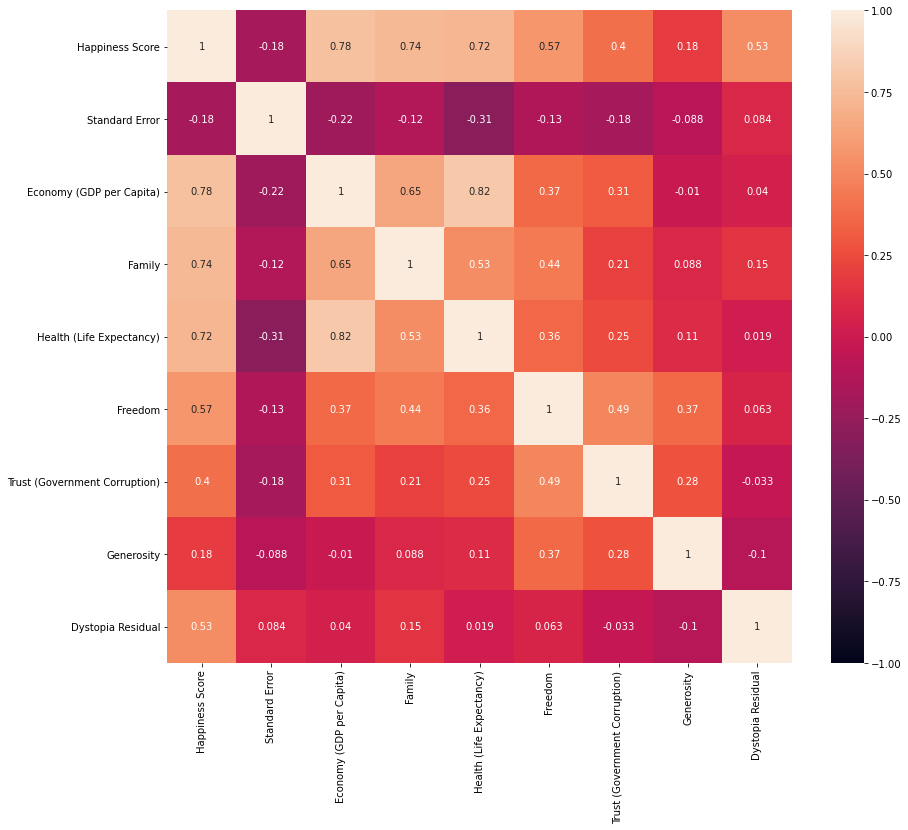

In [5]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot = True, vmin = -1.0, vmax = 1.0)
plt.show()

In [6]:
y = df["Happiness Score"]
X = df.drop("Happiness Score", axis = 1) 

In [7]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [8]:
X

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [9]:
X.skew().sort_values()

Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Economy (GDP per Capita)        -0.317575
Dystopia Residual               -0.238911
Generosity                       1.001961
Trust (Government Corruption)    1.385463
Standard Error                   1.983439
dtype: float64

In [10]:
from sklearn.preprocessing import power_transform

In [11]:
X_new = power_transform(X)

X = pd.DataFrame(X_new,columns = X.columns)
X

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992
1,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011
2,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275
3,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035
4,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118
...,...,...,...,...,...,...,...,...
153,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259
154,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565
155,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216
156,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801


In [12]:
X.skew().sort_values()

Health (Life Expectancy)        -0.183181
Family                          -0.169651
Economy (GDP per Capita)        -0.127233
Freedom                         -0.080728
Standard Error                  -0.020092
Generosity                       0.013320
Dystopia Residual                0.022925
Trust (Government Corruption)    0.185965
dtype: float64

In [13]:
sk = X.skew()

In [14]:
sk

Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

In [15]:
sk[np.abs(sk)>0.5].all()

True

In [16]:
X.skew()[np.abs(X.skew())<0.25].all()

True

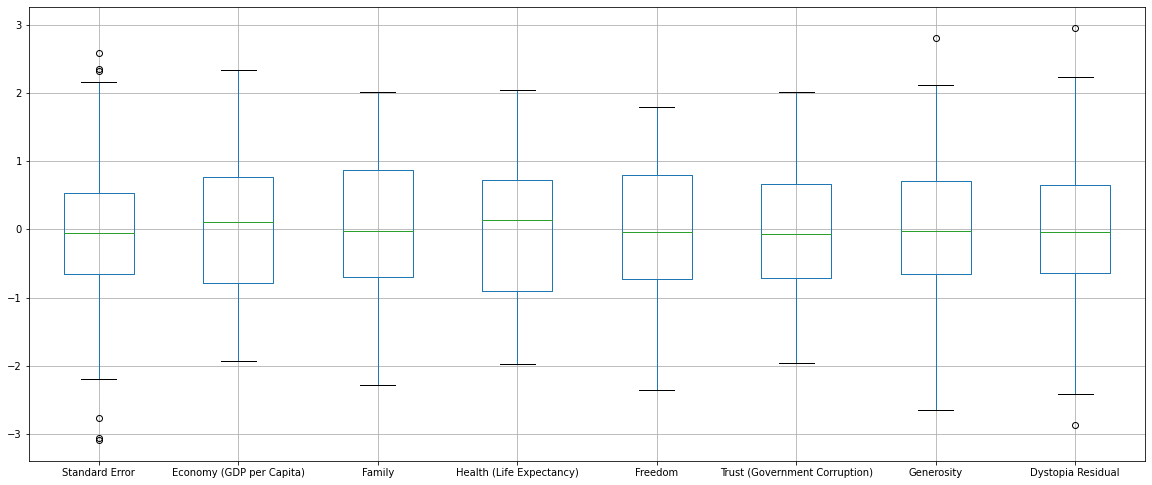

In [17]:
# plotting boxplot:
X.iloc[:,0:8].boxplot(figsize = [20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [18]:
from scipy.stats import zscore
(np.abs(zscore(X))<3).all()    

False

In [19]:
from sklearn.metrics import accuracy_score

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 99)


In [37]:
X_train

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
6,-1.688317,1.251244,1.247511,1.193081,1.330816,1.459916,1.680072,0.651781
51,-0.580057,-0.676736,-0.082782,-0.215603,-0.733958,-1.582273,-0.082654,1.921995
40,2.329617,0.916909,0.712727,-0.230393,0.869856,-1.687753,0.774867,0.279104
49,-0.472053,1.027615,0.787751,1.574554,-1.117723,-1.312476,0.082093,-0.170160
97,1.579480,0.064997,0.652910,0.007446,1.011781,0.324999,-0.017186,-1.563762
...,...,...,...,...,...,...,...,...
151,-0.114959,-1.420147,-0.707255,-1.406673,-0.312079,0.177581,-0.011617,-1.149683
157,1.310323,-1.521226,-2.160397,-1.371811,-0.508362,-0.067326,-0.490415,-0.976645
68,0.401154,-0.173839,-0.839708,-0.158688,-1.200092,-0.963136,0.521844,1.235670
35,-0.911807,0.968259,1.447893,1.581981,0.128365,-0.681434,-0.337367,0.009829


In [38]:
X_test

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
57,0.114047,0.077434,-0.251185,0.303651,-0.178911,-0.748281,-0.666214,0.900089
74,-1.311959,-0.587675,-0.492293,0.386861,1.155026,-0.103592,-0.472364,0.154054
149,-0.785805,-1.590474,-1.709702,-1.486153,-0.427083,0.100132,0.547670,-0.230797
119,-0.695674,-1.922999,-0.142062,-1.798837,-1.316090,-0.490758,0.250408,1.437006
131,-0.626213,-0.088716,-0.066727,0.195304,0.702032,-0.268968,1.329975,-2.392306
4,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118
43,-0.084765,-0.587009,1.612116,-0.303202,1.692142,1.420194,0.083295,0.220434
142,0.062239,0.499979,-0.518061,-0.922453,-0.788540,-0.023170,-1.638457,-1.901722
8,-1.015228,1.024899,1.483723,1.286836,1.529995,1.796168,1.674846,0.270554
78,-1.176504,-0.251396,0.315874,-0.401206,0.662156,0.443056,1.698575,-0.855541


In [39]:
y_train

6      7.378
51     5.889
40     6.168
49     5.948
97     4.885
       ...  
151    3.587
157    2.839
68     5.589
35     6.329
129    4.297
Name: Happiness Score, Length: 126, dtype: float64

In [40]:
y_test

57     5.824
74     5.360
149    3.656
119    4.517
131    4.271
4      7.427
43     6.003
142    3.896
8      7.286
78     5.253
14     7.119
91     5.013
111    4.677
121    4.512
134    4.194
86     5.123
16     6.946
155    3.006
132    4.252
24     6.786
103    4.800
9      7.284
84     5.129
146    3.681
143    3.845
109    4.686
82     5.192
87     5.102
46     5.984
92     5.007
117    4.550
148    3.667
Name: Happiness Score, dtype: float64

In [41]:
X_train.shape

(126, 8)

In [42]:
y_train.shape

(126,)

In [43]:
X_test.shape

(32, 8)

In [44]:
y_test.shape

(32,)

In [45]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [46]:
print(f"regression R2: {LR.score(X_test, y_test)}")

regression R2: 0.9949291440550083
